Getting Kaggle dataset from API

In [ ]:
#install the kaggle library
!pip install kaggle

In [ ]:
#configure the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Kaggle API
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 89% 145M/163M [00:00<00:00, 212MB/s]
100% 163M/163M [00:00<00:00, 225MB/s]


In [ ]:
#extracting the compressed files
from zipfile import ZipFile
dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The Dataset is Extracted")

The Dataset is Extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the Dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir("/content/data/with_mask")
without_mask_files = os.listdir("/content/data/without_mask")

In [ ]:
print(with_mask_files[0:5])
print(without_mask_files[0:5])

['with_mask_3274.jpg', 'with_mask_2139.jpg', 'with_mask_330.jpg', 'with_mask_2056.jpg', 'with_mask_1326.jpg']
['without_mask_2356.jpg', 'without_mask_3650.jpg', 'without_mask_270.jpg', 'without_mask_1085.jpg', 'without_mask_681.jpg']


In [ ]:
print('Number of with Mask Images: ', len(with_mask_files))
print('Number of without Mask Images: ', len(without_mask_files))

Number of with Mask Images:  3725
Number of without Mask Images:  3828


Creating the labels

with mask --> 1

without mask --> 0

In [ ]:
#creating the labels

with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images

<function matplotlib.pyplot.show(close=None, block=None)>

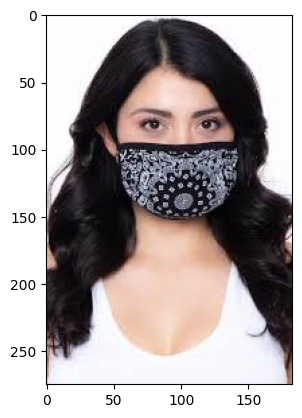

In [ ]:
#displaying the with mask images

img = mpimg.imread("/content/data/with_mask/with_mask_2139.jpg")
imgplot = plt.imshow(img)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

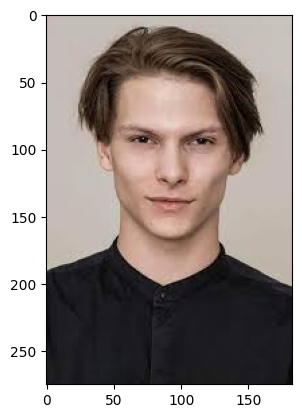

In [ ]:
#displaying the without mask images

img = mpimg.imread("/content/data/without_mask/without_mask_1085.jpg")
imgplot = plt.imshow(img)
plt.show

Resizing the image

In [ ]:
#convert images to numpy arrays

with_mask_path = 'data/with_mask'
without_mask_path = 'data/without_mask'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + '/' + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

for img_file in without_mask_files:
  image = Image.open(without_mask_path + '/' + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
print(data[0])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [240 239 235]
  [240 239 235]
  [240 239 235]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [238 237 233]
  [239 238 234]
  [239 238 234]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [240 239 235]
  [241 241 237]
  [241 240 236]]]


In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting the image list and label list to numpy array

X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


Train Test Split

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y , test_size = 0.2 , random_state = 2)

In [ ]:
print(X.shape , X_train.shape , X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
#scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[0.44313725 0.58823529 0.76078431]
   [0.45490196 0.59607843 0.77254902]
   [0.4745098  0.61568627 0.78823529]
   ...
   [0.57254902 0.71764706 0.89411765]
   [0.57254902 0.71764706 0.89411765]
   [0.56862745 0.71372549 0.89019608]]

  [[0.42745098 0.58039216 0.73333333]
   [0.4

Building a Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))

In [ ]:
#compile the neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 [==============================] - 5s 21ms/step - loss: 0.5140 - accuracy: 0.7843 - val_loss: 0.2910 - val_accuracy: 0.8810
Epoch 2/10
170/170 [==============================] - 3s 17ms/step - loss: 0.3101 - accuracy: 0.8841 - val_loss: 0.2610 - val_accuracy: 0.9008
Epoch 3/10
170/170 [==============================] - 4s 21ms/step - loss: 0.2743 - accuracy: 0.8882 - val_loss: 0.2453 - val_accuracy: 0.8992
Epoch 4/10
170/170 [==============================] - 3s 17ms/step - loss: 0.2169 - accuracy: 0.9167 - val_loss: 0.3239 - val_accuracy: 0.8909
Epoch 5/10
170/170 [==============================] - 3s 17ms/step - loss: 0.1754 - accuracy: 0.9325 - val_loss: 0.2565 - val_accuracy: 0.9190
Epoch 6/10
170/170 [==============================] - 3s 17ms/step - loss: 0.1597 - accuracy: 0.9406 - val_loss: 0.2483 - val_accuracy: 0.9107
Epoch 7/10
170/170 [==============================] - 3s 19ms/step - loss: 0.1269 - accuracy: 0.9513 - val_loss: 0.4163 - val_accuracy: 0.8942

Model Evaluation

In [ ]:
loss , accuracy = model.evaluate(X_test_scaled, Y_test)
print(loss)
print(accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.2767 - accuracy: 0.9259
0.276671826839447
0.9258769154548645


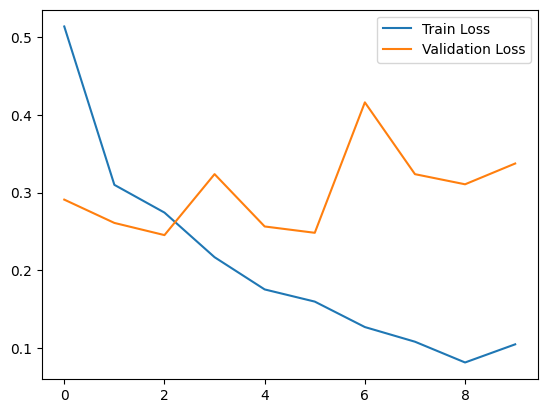

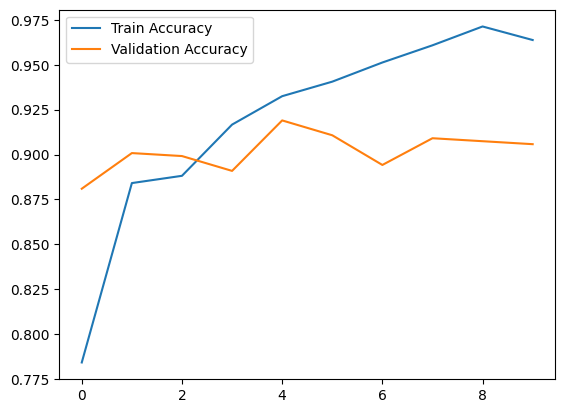

In [ ]:
h = history

#plot the loss value

plt.plot(h.history['loss'],label='Train Loss')
plt.plot(h.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

#plot the accuracy value

plt.plot(h.history['accuracy'],label='Train Accuracy')
plt.plot(h.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/images (4).jpeg


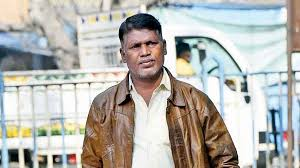

1/1 [==============================] - 0s 19ms/step
[[0.41540018 0.6138724 ]]
[1]
The person is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(image_reshaped)
print(input_prediction)

input_prediction_label = [np.argmax(input_prediction)]
print(input_prediction_label)

if input_prediction_label[0] == 1:
  print('The person is wearing a mask')
else:
  print('The person is not wearing a mask')